In [1]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
birthDF = pd.read_csv('data5/daily-total-female-births.txt',
                parse_dates=['Date'], index_col='Date')
birthDF

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [3]:
birthDF.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [4]:
airDF = pd.read_csv('data5/international-airline-passengers.txt',
                   parse_dates=['time'], index_col='time')
airDF

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
tempDF = pd.read_csv('data5/daily-min-temperatures.csv',
                    parse_dates=['Date'], index_col='Date')
tempDF

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


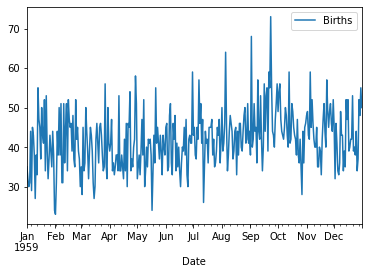

In [6]:
birthDF.plot()
plt.show()

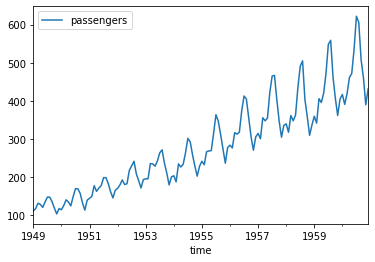

In [7]:
airDF.plot()
plt.show()

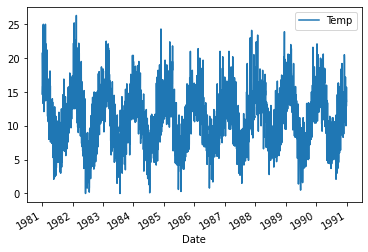

In [8]:
tempDF.plot()
plt.show()

In [17]:
n =int( len( birthDF)/2 )
print( birthDF.iloc[:n].mean() )
print( birthDF.iloc[n:].mean() )
print( birthDF.iloc[:n].var() )
print( birthDF.iloc[n:].var() )

Births    39.763736
dtype: float64
Births    44.185792
dtype: float64
Births    49.485308
dtype: float64
Births    48.976281
dtype: float64


In [18]:
n =int( len( airDF)/2 )
print( airDF.iloc[:n].mean() )
print( airDF.iloc[n:].mean() )
print( airDF.iloc[:n].var() )
print( airDF.iloc[n:].var() )

passengers    182.902778
dtype: float64
passengers    377.694444
dtype: float64
passengers    2275.69464
dtype: float64
passengers    7471.736307
dtype: float64


In [19]:
n =int( len( tempDF)/2 )
print( tempDF.iloc[:n].mean() )
print( tempDF.iloc[n:].mean() )
print( tempDF.iloc[:n].var() )
print( tempDF.iloc[n:].var() )

Temp    11.043507
dtype: float64
Temp    11.312
dtype: float64
Temp    18.170782
dtype: float64
Temp    14.961956
dtype: float64


In [20]:
tempDF['days'] = range(0, len( tempDF))
tempDF

,Temp,days
Date,,
1981-01-01,20.7,0
1981-01-02,17.9,1
1981-01-03,18.8,2
1981-01-04,14.6,3
1981-01-05,15.8,4
...,...,...
1990-12-27,14.0,3645
1990-12-28,13.6,3646
1990-12-29,13.5,3647


In [21]:
temps = tempDF['Temp'].values
days = tempDF['days'].values

In [22]:
temps

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [23]:
days

array([   0,    1,    2, ..., 3647, 3648, 3649])

In [24]:
tempDF.corr()

,Temp,days
Temp,1.00000,0.01218
days,0.01218,1.00000


In [25]:
np.corrcoef( temps, days)

array([[1.        , 0.01218004],
       [0.01218004, 1.        ]])

In [27]:
temps[1:]

array([17.9, 18.8, 14.6, ..., 13.5, 15.7, 13. ])

In [28]:
temps[:-1]

array([20.7, 17.9, 18.8, ..., 13.6, 13.5, 15.7])

In [29]:
np.corrcoef( temps[1:], temps[:-1]) # lag1 

array([[1.        , 0.77487022],
       [0.77487022, 1.        ]])

In [30]:
np.corrcoef( temps[2:], temps[:-2]) # lag2

array([[1.        , 0.63111946],
       [0.63111946, 1.        ]])

In [33]:
np.corrcoef( temps[3:], temps[:-3])[0,1] # lag2

0.5863748620126278

In [32]:
autocorrelation=[]
for shift in range(1,10):
    c = np.corrcoef(temps[:-shift], temps[shift:] )[0,1]
    autocorrelation.append( c )
autocorrelation

[0.7748702165384457,
 0.6311194620684836,
 0.5863748620126278,
 0.5788976133377621,
 0.578571574411206,
 0.5765484145122557,
 0.575928953583158,
 0.5695569780397494,
 0.5634747178408281]

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, acf

In [35]:
temps

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [36]:
tempDF['Temp']

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [37]:
result = acf(tempDF['Temp'])
result

array([1.        , 0.774268  , 0.6302866 , 0.58529312, 0.57774567,
       0.57728013, 0.57510412, 0.57437039, 0.56782622, 0.56120131,
       0.54668689, 0.53793111, 0.54012564, 0.54247126, 0.53688723,
       0.53429917, 0.53043593, 0.52911166, 0.53037444, 0.52280732,
       0.52303677, 0.52224579, 0.51426684, 0.49837745, 0.49302665,
       0.49946731, 0.50428521, 0.50068173, 0.49157081, 0.48146406,
       0.47421245, 0.47568054, 0.46311862, 0.46215585, 0.46630567,
       0.45459092, 0.43378232, 0.4203594 , 0.42707505, 0.42196486,
       0.4079607 ])

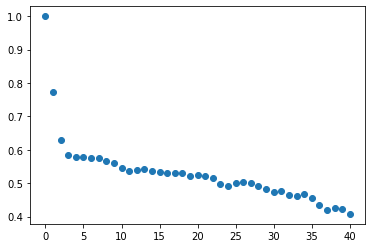

In [38]:
plt.scatter( range(0,len(result ) ), result )
plt.show()

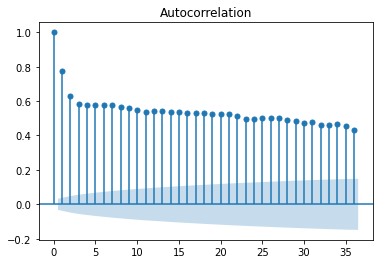

In [39]:
plot_acf( tempDF['Temp'])
plt.show()

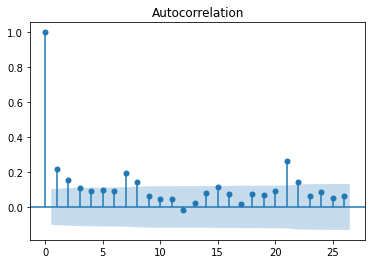

In [40]:
plot_acf( birthDF['Births'] )
plt.show()

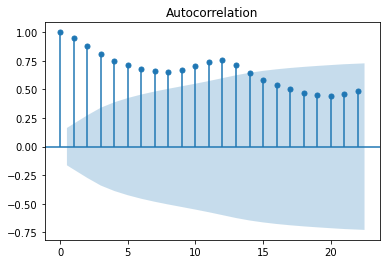

In [41]:
plot_acf( airDF['passengers'] )
plt.show()

In [42]:
from statsmodels.tsa.stattools import adfuller

#### 검증 조건 ( p-value : 5% 이내면 reject으로 대체가설 선택됨 )
- 귀무가설(H0): non-stationary.
- 대체가설 (H1): stationary.

In [45]:
result = adfuller( tempDF['Temp'])
print( result[0] ) # adf ( 작을수록 :귀무가설을 기각시킬 확율이 높다)
print( result[1] ) # p-value( 귀무가설기각: stationary)

-4.444804924611689
0.0002470826300361109


In [43]:
result = adfuller( birthDF['Births'] )
print( result[0] ) # adf ( 작을수록 :귀무가설을 기각시킬 확율이 높다)
print( result[1] ) # p-value( 귀무가설기각: stationary)

-4.808291253559763
5.243412990149865e-05


In [44]:
result = adfuller( airDF['passengers'] )
print( result[0] ) #adf ( 클수록: 귀무가설채택 확률이 높다 )
print( result[1] ) # p-value( 귀무가설채택: non-stationary )

0.8153688792060569
0.9918802434376411


In [46]:
order = (2,1,2)
model = ARIMA( airDF, order )
rfit = model.fit()

In [48]:
type( rfit)
rfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.712
Date:                Wed, 28 Jul 2021   AIC                           1344.043
Time:                        16:29:40   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5308      0.708      3.573      0.000       1.143       3.919
ar.L1.D.passengers     1.6477      0.033     49.934      0.000       1.583       1.712
ar.L2.D.passengers    -0.9094      0.033    -27.881      0.000      -0.973      -0.845
ma.L1.D.passengers    -1.9100      0.065    -29.498      0.000      -2.037      -1.783
ma.L2.D.passengers     0.9998      0.068     14.796      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0001           -0.0479
MA.2            0.9551           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

ARIMA(2,1,2)
\begin{equation}
y_t = 1.6477 y'_{t-1} -0.9094 y'_{t-2} + e_t -1.9101e_{t-1} +0.9999e_{t-2}
\end{equation}
</h3>
를 따르는 ARIMA모델임을 확인할 수 있다.

In [49]:
rfit.aic

1344.0433898318547

In [50]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [51]:
arima_aic_check( airDF, [3,3,3] )

,order,AIC
21,p:2 d:1 q:2,1344.043390
20,p:2 d:1 q:1,1361.695814
13,p:1 d:1 q:2,1371.815374
15,p:1 d:2 q:2,1393.908442
23,p:2 d:2 q:2,1394.656208
7,p:0 d:2 q:2,1396.371696
19,p:2 d:1 q:0,1397.975152
4,p:0 d:1 q:2,1398.385532
3,p:0 d:1 q:1,1398.827110
12,p:1 d:1 q:1,1402.145400


In [52]:
rfit.predict( 1, 10, typ='levels')

1949-02-01    114.530757
1949-03-01    121.350748
1949-04-01    137.221457
1949-05-01    129.789092
1949-06-01    119.168608
1949-07-01    136.761944
1949-08-01    149.738605
1949-09-01    147.366526
1949-10-01    134.797514
1949-11-01    121.075654
Freq: MS, dtype: float64

In [54]:
rfit.predict( '1950-01-01', '1950-12-01', typ='levels')

1950-01-01    131.475133
1950-02-01    132.057210
1950-03-01    143.952499
1950-04-01    156.327486
1950-05-01    147.709413
1950-06-01    136.540833
1950-07-01    155.852622
1950-08-01    168.938373
1950-09-01    162.269454
1950-10-01    147.631481
1950-11-01    126.284860
1950-12-01    115.223830
Freq: MS, dtype: float64

In [55]:
rfit.predict( '1960-07-01', '1961-07-01', typ='levels')

1960-07-01    553.886382
1960-08-01    599.047244
1960-09-01    555.148495
1960-10-01    458.015781
1960-11-01    421.193060
1960-12-01    378.522291
1961-01-01    433.105255
1961-02-01    450.862833
1961-03-01    479.779438
1961-04-01    511.939286
1961-05-01    539.295020
1961-06-01    555.785523
1961-07-01    558.742071
Freq: MS, dtype: float64

In [56]:
preds = rfit.predict( '1960-07-01', '1961-07-01', typ='levels')

In [57]:
train = airDF[:'1960-07-01']
test = airDF['1960-07-01':]

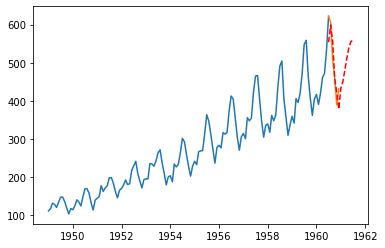

In [61]:
plt.plot( train )
plt.plot( test)
plt.plot(preds, 'r--')
plt.show()

In [53]:
airDF

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
